In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import polars as plot
import glob
from importlib import reload


In [2]:
import seasonality.seasonalityfunctions as sf
import seasonality.onset_demise as od

In [92]:
reload(od)
reload(sf)

<module 'seasonality.seasonalityfunctions' from '/Users/gbromley/code/PrecipitationSeasonality/seasonality/seasonalityfunctions.py'>

In [4]:
test_bombardi = xr.open_dataset('/Users/gbromley/data/b17_cpc_onset-demise/onset.wet.season.CPC_UNI.1999.nc', decode_cf = False)

In [5]:
### processing CPC data 


cpc_files = glob.glob('/Users/gbromley/data/cpc_uni_global/precip.1999.nc')
cpc_raw = xr.open_dataset(cpc_files[0])

### Setting coordinate data for next step 
lat = np.arange(-90, 90, 0.5)
lon = np.arange(0, 360, 0.5)
time = cpc_raw['time'].data

### transposing dimensions so the world is right side up 

flipped_cpc = np.flip(cpc_raw['precip'].values, axis=1)
### cpc latitudes are reversed so that they are decreasing instead of increasing. The following code reverses it. 
cpc_pr = xr.DataArray(flipped_cpc, coords=[('time', time), ('lat', lat), ('lon', lon)], name='precipitation')

### Selecting out CONUS from the global data.
conus = {'lat': slice(25,50), 'lon': slice(360-125, 360-66)}
cpc_conus = cpc_pr.sel(lat = conus['lat'], lon = conus['lon'])

In [6]:
annual_cycle = sf.calc_annual_cycle(cpc_conus)

In [7]:
start_wet = od.B17_analysis_start(annual_cycle)

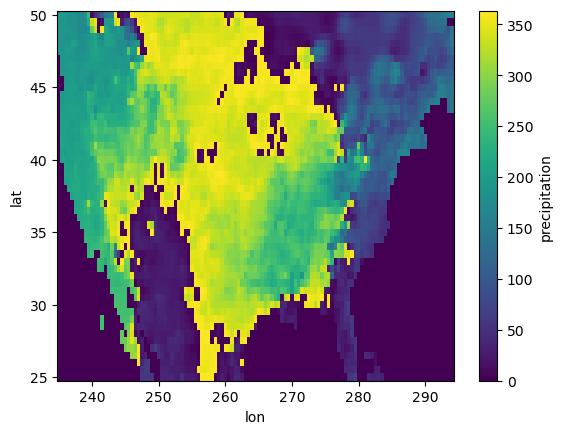

In [8]:
start_wet.plot()

In [35]:
onset = od.onset_B17(cpc_conus, start_wet)

TypeError: onset_B17() missing 2 required positional arguments: 'years' and 'startWet'

In [11]:
onset

<xarray.DataArray (lat: 51, lon: 119, year: 1)>
array([[[ nan],
        [ nan],
        [ nan],
        ...,
        [ nan],
        [ nan],
        [ nan]],

       [[ nan],
        [ nan],
        [ nan],
        ...,
        [ nan],
        [ nan],
        [ nan]],

       [[ nan],
        [ nan],
        [ nan],
        ...,
...
        ...,
        [108.],
        [ 90.],
        [135.]],

       [[192.],
        [194.],
        [192.],
        ...,
        [135.],
        [ nan],
        [ nan]],

       [[196.],
        [196.],
        [191.],
        ...,
        [151.],
        [158.],
        [160.]]])
Coordinates:
  * lat      (lat) float64 25.0 25.5 26.0 26.5 27.0 ... 48.0 48.5 49.0 49.5 50.0
  * lon      (lon) float64 235.0 235.5 236.0 236.5 ... 292.5 293.0 293.5 294.0
Dimensions without coordinates: year

In [32]:
B17_onset = test_bombardi['DOY'].sel(conus).squeeze()
B17_onset = xr.where(B17_onset == -999., np.nan, B17_onset)

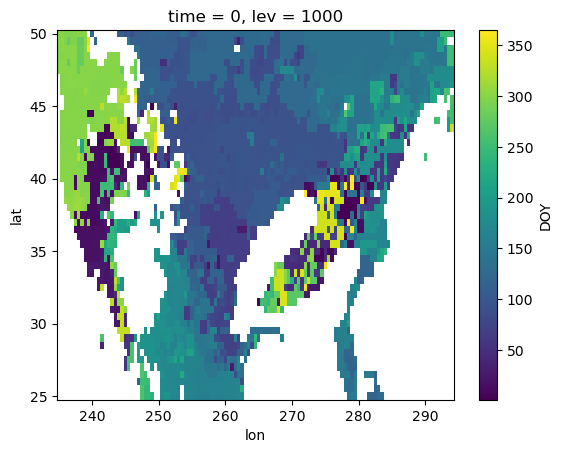

In [33]:
B17_onset.plot()

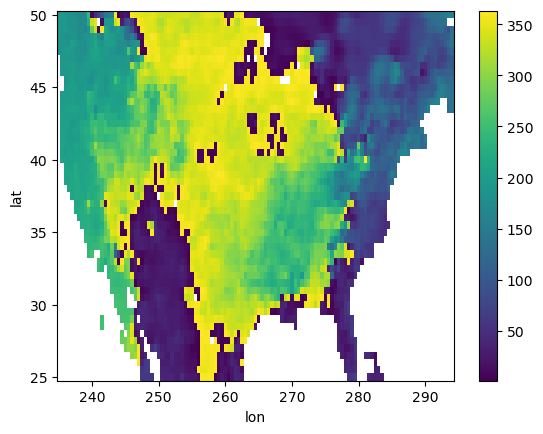

In [34]:
onset.plot()

In [21]:
onset.values

array([[[ nan],
        [ nan],
        [ nan],
        ...,
        [ nan],
        [ nan],
        [ nan]],

       [[ nan],
        [ nan],
        [ nan],
        ...,
        [ nan],
        [ nan],
        [ nan]],

       [[ nan],
        [ nan],
        [ nan],
        ...,
        [ nan],
        [ nan],
        [ nan]],

       ...,

       [[190.],
        [194.],
        [196.],
        ...,
        [108.],
        [ 90.],
        [135.]],

       [[192.],
        [194.],
        [192.],
        ...,
        [135.],
        [ nan],
        [ nan]],

       [[196.],
        [196.],
        [191.],
        ...,
        [151.],
        [158.],
        [160.]]])

<xarray.DataArray 'DOY' (lat: 51, lon: 119)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ...,
       [296., 300., 300., ..., 144., 252., 252.],
       [300., 300., 296., ..., 249.,  nan,  nan],
       [300., 300., 296., ..., 249., 249., 249.]], dtype=float32)
Coordinates:
    time     int32 0
    lev      int32 1000
  * lat      (lat) float64 25.0 25.5 26.0 26.5 27.0 ... 48.0 48.5 49.0 49.5 50.0
  * lon      (lon) float64 235.0 235.5 236.0 236.5 ... 292.5 293.0 293.5 294.0

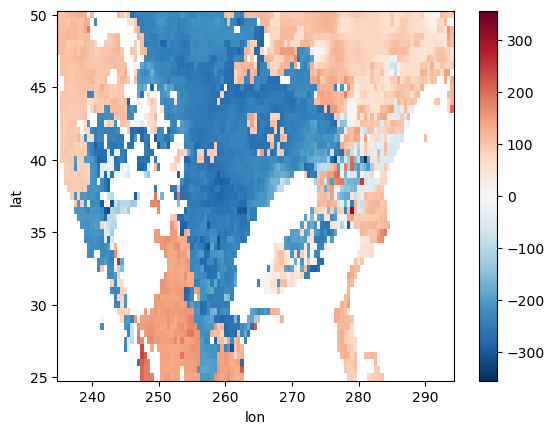

In [27]:
(B17_onset - onset.squeeze()).plot()

In [36]:
def find_sequence(arr, sequence):
    if len(sequence) == 0:
        return -1

    # Masks for each element in the sequence
    masks = [arr == val for val in sequence]

    # Find indices where the first element of the sequence occurs
    first_elem_indices = np.where(masks[0])[0]

    for idx in first_elem_indices:
        if all((idx + i < len(arr) and masks[i][idx + i]) for i in range(len(sequence))):
            return idx

    return -1

In [ ]:
mask = (seq[i-2] < 0,)

In [54]:
arr = np.array([1, -3, 2, -7, 5, 6, 7, 8, 9, -4, -3, -2])
sequence = [5, 3, 2]
index = find_sequence(arr, sequence)
index

-1

In [95]:
array = np.array([1, 2, 3])
variable = xr.Variable("x", array)
data_array = xr.DataArray(variable, [("x", -array)])
dataset = xr.Dataset({"y": variable}, {"x": -array})

In [96]:
dataset

<xarray.Dataset>
Dimensions:  (x: 3)
Coordinates:
  * x        (x) int64 -1 -2 -3
Data variables:
    y        (x) int64 1 2 3

In [71]:
x = np.linspace(-10, 10, 400)
arr = x**3

# Calculate the first derivative
dy = 3 * x**2

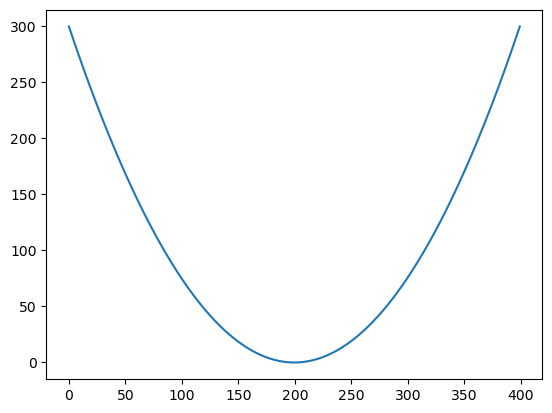

In [76]:
plt.plot(dy)

In [64]:
f = np.array([1, 2, 4, 7, 11, 16], dtype=float)

np.gradient(f)


np.gradient(f, 2)


array([0.5 , 0.75, 1.25, 1.75, 2.25, 2.5 ])

In [86]:
sf.find_ddt_onset(np.sign(np.diff(np.gradient(arr))))

195

In [93]:
x = np.linspace(-10, 10, 400)
arr = x**3
sf.find_ddt_onset(arr)


195

In [97]:
array = np.array([1,2,3])
isinstance(array, np.ndarray)

True

In [101]:
time_array = pd.date_range('2000-01-01', freq='D', periods = 5)

In [104]:
time_array

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05'],
              dtype='datetime64[ns]', freq='D')

In [102]:
isinstance(time_array, pd.DatetimeIndex)

True

In [105]:
isinstance(time_array[0], np.datetime64[ns])

NameError: name 'ns' is not defined